## Customer Engagement Engine(CEE) - build predictive models that drive personalization and optimization within CEE.

### 1. Datasets Provided
- campaigns.csv – Campaign metadata (channel, launch date, objective, audience size)
- engagements.csv – Monthly campaign performance (sent, opened, clicked, converted, revenue)
- customers.csv – Customer attributes (tier, tenure, preferred channel, active status)
### 2. Tasks
A. Data Exploration & Feature Engineering
- Join datasets to create a customer × campaign modeling table.
- Engineer features: engagement history, tenure, preferred channel, etc.
- Explore patterns across segments (tier, channel, objective).

B. Predictive Modeling
- Build a classification model to predict conversion likelihood (1 = converted, 0 = not).
- Evaluate using metrics (AUC, precision, recall, F1).
- Identify top 5 most predictive features.

C. Interpretation & Business Application
- Explain what drives engagement or conversion.
- Recommend how the CEE could use these insights to prioritize customers or channels.
- Suggest how the model could integrate into CEE for personalization or targeting.

### 3. Deliverables
1. Jupyter Notebook (.ipynb) with code and outputs.
2. Executive Summary (.pdf or .docx) covering: approach, key findings, and recommendations.
3. Optional: Model artifact (.pkl) to demonstrate deployment readiness.
### 4. Evaluation Criteria
- Data Preparation & Feature Engineering – 25%
- Modeling Technique & Justification – 25%
- Interpretability & Insights – 30%
- Business Application – 15%
- Communication & Clarity – 5%
### 5. Submission
- Deadline: within 7 calendar days of receiving the assessment.
- File names:
[YourName]_CEE_ML_Assessment.ipynb
[YourName]_CEE_ExecutiveSummary.pdf

### 1. Dataset Exploration
#### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

##### Load Datasets

In [5]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

# Load datasets
campaigns_df = pd.read_csv('cee-dataset/campaigns.csv')
customers_df = pd.read_csv('cee-dataset/customers.csv')
engagements_df = pd.read_csv('cee-dataset/engagements.csv')
interactions_df = pd.read_csv('cee-dataset/interactions.csv')

In [4]:
print("\n1. Dataset Shapes:")
print(f"   - campaigns.csv: {campaigns_df.shape}")
print(f"   - customers.csv: {customers_df.shape}")
print(f"   - engagements.csv: {engagements_df.shape}")
print(f"   - interactions.csv: {interactions_df.shape}")

print("\n2. Campaigns Dataset Overview:")
print(campaigns_df.head())
print(f"\n   Data types:\n{campaigns_df.dtypes}")
print(f"\n   Missing values:\n{campaigns_df.isnull().sum()}")
print(f"\n   Unique campaigns: {campaigns_df['campaign_id'].nunique()}")

print("\n3. Customers Dataset Overview:")
print(customers_df.head())
print(f"\n   Data types:\n{customers_df.dtypes}")
print(f"\n   Missing values:\n{customers_df.isnull().sum()}")
print(f"\n   Unique customers: {customers_df['customer_id'].nunique()}")
print(f"\n   Tier distribution:\n{customers_df['tier'].value_counts()}")
print(f"\n   Preferred channel distribution:\n{customers_df['preferred_channel'].value_counts()}")
print(f"\n   Active customers: {customers_df['is_active'].sum()} / {len(customers_df)}")

print("\n4. Engagements Dataset Overview:")
print(engagements_df.head())
print(f"\n   Data types:\n{engagements_df.dtypes}")
print(f"\n   Missing values:\n{engagements_df.isnull().sum()}")
print(f"\n   Date range: {engagements_df['month'].min()} to {engagements_df['month'].max()}")

print("\n5. Interactions Dataset Overview:")
print(interactions_df.head())
print(f"\n   Data types:\n{interactions_df.dtypes}")
print(f"\n   Missing values:\n{interactions_df.isnull().sum()}")
print(f"\n   Unique customers in interactions: {interactions_df['customer_id'].nunique()}")
print(f"\n   Unique campaigns in interactions: {interactions_df['campaign_id'].nunique()}")
print(f"\n   Conversion rate: {interactions_df['converted'].mean():.4f} ({interactions_df['converted'].sum()} conversions out of {len(interactions_df)} interactions)")

# Check date formats and convert if needed
print("\n6. Date Column Analysis:")
print(f"   Campaigns launch_date sample: {campaigns_df['launch_date'].head(3).tolist()}")
print(f"   Customers relationship_start sample: {customers_df['relationship_start'].head(3).tolist()}")
print(f"   Interactions send_date sample: {interactions_df['send_date'].head(3).tolist()}")

# Check for overlapping keys
print("\n7. Key Relationships:")
print(f"   Campaign IDs in campaigns: {sorted(campaigns_df['campaign_id'].unique())}")
print(f"   Campaign IDs in interactions: {sorted(interactions_df['campaign_id'].unique())}")
print(f"   Campaign IDs match: {set(campaigns_df['campaign_id']) == set(interactions_df['campaign_id'])}")
print(f"   Customer IDs in customers: {customers_df['customer_id'].nunique()}")
print(f"   Customer IDs in interactions: {interactions_df['customer_id'].nunique()}")
print(f"   Customers in interactions but not in customers table: {len(set(interactions_df['customer_id']) - set(customers_df['customer_id']))}")

# Basic statistics
print("\n8. Basic Statistics:")
print("\n   Interactions - Conversion Statistics:")
print(f"   - Total interactions: {len(interactions_df)}")
print(f"   - Opened: {interactions_df['opened'].sum()} ({interactions_df['opened'].mean():.2%})")
print(f"   - Clicked: {interactions_df['clicked'].sum()} ({interactions_df['clicked'].mean():.2%})")
print(f"   - Converted: {interactions_df['converted'].sum()} ({interactions_df['converted'].mean():.2%})")
print(f"   - Total revenue: RM {interactions_df['revenue_rm'].sum():,.2f}")
print(f"   - Average revenue per conversion: RM {interactions_df[interactions_df['converted']==1]['revenue_rm'].mean():,.2f}")


1. Dataset Shapes:
   - campaigns.csv: (10, 7)
   - customers.csv: (5000, 7)
   - engagements.csv: (30, 8)
   - interactions.csv: (30000, 13)

2. Campaigns Dataset Overview:
   campaign_id campaign_name   channel   objective launch_date  audience_size  \
0          201        CEE_01  App Push      Upsell  2025-07-01           5111   
1          202        CEE_02  WhatsApp  Cross-Sell  2025-07-08          41249   
2          203        CEE_03  App Push   Retention  2025-07-15          22747   
3          204        CEE_04  App Push  Cross-Sell  2025-07-22          40662   
4          205        CEE_05     Email      Upsell  2025-07-29           8325   

   budget_rm  
0     131428  
1      40255  
2      16648  
3      33728  
4      93079  

   Data types:
campaign_id       int64
campaign_name    object
channel          object
objective        object
launch_date      object
audience_size     int64
budget_rm         int64
dtype: object

   Missing values:
campaign_id      0
campaign_na

In [8]:
print("\n" + "=" * 80)
print("SECTION 1.2: DATASET JOINING")
print("=" * 80)

# Convert date columns to datetime for proper handling
interactions_df['send_date'] = pd.to_datetime(interactions_df['send_date'])
customers_df['relationship_start'] = pd.to_datetime(customers_df['relationship_start'])
campaigns_df['launch_date'] = pd.to_datetime(campaigns_df['launch_date'])

# Step 1: Start with interactions_df as the base (customer × campaign level data)
print("\nStep 1: Starting with interactions.csv as base table")
print(f"   Base table shape: {interactions_df.shape}")
print(f"   This represents individual customer-campaign interactions (granular level)")

# Step 2: Join with customers_df on customer_id
print("\nStep 2: Joining with customers.csv on customer_id")
print(f"   Customers to join: {customers_df.shape[0]}")
print(f"   Expected join: LEFT JOIN (keep all interactions, add customer attributes)")

modeling_df = interactions_df.merge(
    customers_df,
    on='customer_id',
    how='left',
    suffixes=('', '_customer')
)

print(f"   After join shape: {modeling_df.shape}")
print(f"   New columns added: {set(modeling_df.columns) - set(interactions_df.columns)}")

# Check for missing customer data
missing_customers = modeling_df[modeling_df['tier'].isna()]
if len(missing_customers) > 0:
    print(f"   WARNING: {len(missing_customers)} interactions have no matching customer data")
    print(f"   Customer IDs with missing data: {missing_customers['customer_id'].unique()[:10]}")
else:
    print("   ✓ All interactions have matching customer data")

# Step 3: Join with campaigns_df on campaign_id
print("\nStep 3: Joining with campaigns.csv on campaign_id")
print(f"   Campaigns to join: {campaigns_df.shape[0]}")

modeling_df = modeling_df.merge(
    campaigns_df,
    on='campaign_id',
    how='left',
    suffixes=('', '_campaign')
)

print(f"   After join shape: {modeling_df.shape}")
print(f"   New columns added: {set(modeling_df.columns) - set(modeling_df.columns) if 'campaign_name' in modeling_df.columns else 'campaign_name, channel_campaign, objective, launch_date, audience_size, budget_rm'}")

# Check for missing campaign data
missing_campaigns = modeling_df[modeling_df['campaign_name'].isna()]
if len(missing_campaigns) > 0:
    print(f"   WARNING: {len(missing_campaigns)} interactions have no matching campaign data")
else:
    print("   ✓ All interactions have matching campaign data")

# Step 4: Handle duplicate column names (channel appears in both interactions and campaigns)
print("\nStep 4: Handling duplicate column names")
if 'channel' in interactions_df.columns and 'channel' in campaigns_df.columns:
    # Keep channel from interactions (actual channel used) and rename campaign channel if needed
    if 'channel_campaign' in modeling_df.columns:
        print("   Channel column from campaigns renamed to 'channel_campaign'")
    else:
        # Rename for clarity
        modeling_df = modeling_df.rename(columns={'channel': 'channel_used'})
        if 'channel_campaign' in campaigns_df.columns:
            pass
        else:
            # Create channel_campaign from campaigns
            channel_mapping = campaigns_df.set_index('campaign_id')['channel'].to_dict()
            modeling_df['channel_campaign'] = modeling_df['campaign_id'].map(channel_mapping)
            print("   Created 'channel_campaign' from campaigns table")

# Step 5: Display final joined dataset structure
print("\nStep 5: Final Modeling Dataset Structure")
print(f"   Final shape: {modeling_df.shape}")
print(f"   Columns ({len(modeling_df.columns)}):")
for i, col in enumerate(modeling_df.columns, 1):
    print(f"   {i:2d}. {col}")

print("\nStep 6: Sample of joined data")
print(modeling_df.head(10))

print("\nStep 7: Data quality checks")
print(f"   Total rows: {len(modeling_df)}")
print(f"   Missing values per column:")
missing_summary = modeling_df.isnull().sum()
print(missing_summary[missing_summary > 0] if missing_summary.sum() > 0 else "   ✓ No missing values")

# Check for duplicate interactions
duplicates = modeling_df.duplicated(subset=['customer_id', 'campaign_id', 'send_date']).sum()
print(f"   Duplicate interactions (same customer, campaign, date): {duplicates}")

print("\n" + "=" * 80)
print("JOINING COMPLETE - Ready for Feature Engineering")
print("=" * 80)


SECTION 1.2: DATASET JOINING

Step 1: Starting with interactions.csv as base table
   Base table shape: (30000, 13)
   This represents individual customer-campaign interactions (granular level)

Step 2: Joining with customers.csv on customer_id
   Customers to join: 5000
   Expected join: LEFT JOIN (keep all interactions, add customer attributes)
   After join shape: (30000, 19)
   New columns added: {'tier', 'region', 'relationship_start', 'preferred_channel', 'is_active', 'age'}
   ✓ All interactions have matching customer data

Step 3: Joining with campaigns.csv on campaign_id
   Campaigns to join: 10
   After join shape: (30000, 25)
   New columns added: set()
   ✓ All interactions have matching campaign data

Step 4: Handling duplicate column names
   Channel column from campaigns renamed to 'channel_campaign'

Step 5: Final Modeling Dataset Structure
   Final shape: (30000, 25)
   Columns (25):
    1. interaction_id
    2. customer_id
    3. campaign_id
    4. send_date
    5. c

In [9]:
print("\n" + "=" * 80)
print("SECTION 1.3: FEATURE ENGINEERING")
print("=" * 80)

# Create a copy to avoid modifying the original
df = modeling_df.copy()

print(f"\nStarting feature engineering on {len(df)} rows...")
print(f"Initial columns: {len(df.columns)}")

# ============================================================================
# 1. TEMPORAL FEATURES
# ============================================================================
print("\n1. Creating Temporal Features...")

# Customer tenure (days from relationship_start to send_date)
df['customer_tenure_days'] = (df['send_date'] - df['relationship_start']).dt.days
df['customer_tenure_months'] = df['customer_tenure_days'] / 30.44  # Average days per month
df['customer_tenure_years'] = df['customer_tenure_days'] / 365.25

# Days since campaign launch
df['days_since_campaign_launch'] = (df['send_date'] - df['launch_date']).dt.days

# Extract time-based features from send_date
df['send_year'] = df['send_date'].dt.year
df['send_month'] = df['send_date'].dt.month
df['send_day'] = df['send_date'].dt.day
df['send_day_of_week'] = df['send_date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['send_day_name'] = df['send_date'].dt.day_name()
df['send_is_weekend'] = (df['send_day_of_week'] >= 5).astype(int)

# Send hour features (already exists, but create binned versions)
df['send_hour_morning'] = ((df['send_hour'] >= 6) & (df['send_hour'] < 12)).astype(int)
df['send_hour_afternoon'] = ((df['send_hour'] >= 12) & (df['send_hour'] < 18)).astype(int)
df['send_hour_evening'] = ((df['send_hour'] >= 18) & (df['send_hour'] < 22)).astype(int)
df['send_hour_night'] = ((df['send_hour'] >= 22) | (df['send_hour'] < 6)).astype(int)

print(f"   ✓ Created {len([c for c in df.columns if 'tenure' in c or 'send_' in c or 'days_since' in c])} temporal features")

# ============================================================================
# 2. ENGAGEMENT HISTORY FEATURES
# ============================================================================
print("\n2. Creating Engagement History Features...")

# prior_engagements_90d already exists, but let's create additional historical features
# Calculate customer-level historical metrics
customer_history = interactions_df.groupby('customer_id').agg({
    'opened': ['sum', 'mean'],
    'clicked': ['sum', 'mean'],
    'converted': ['sum', 'mean'],
    'revenue_rm': ['sum', 'mean'],
    'interaction_id': 'count'
}).reset_index()

customer_history.columns = ['customer_id', 
                           'hist_total_opens', 'hist_open_rate',
                           'hist_total_clicks', 'hist_click_rate',
                           'hist_total_conversions', 'hist_conversion_rate',
                           'hist_total_revenue', 'hist_avg_revenue',
                           'hist_total_interactions']

# Merge historical features (excluding current interaction)
# We'll use a left merge and then subtract current interaction values
df = df.merge(customer_history, on='customer_id', how='left')

# Adjust for current interaction (subtract current values from totals)
df['hist_total_opens'] = df['hist_total_opens'] - df['opened']
df['hist_total_clicks'] = df['hist_total_clicks'] - df['clicked']
df['hist_total_conversions'] = df['hist_total_conversions'] - df['converted']
df['hist_total_interactions'] = df['hist_total_interactions'] - 1

# Recalculate rates based on prior interactions
df['hist_open_rate'] = np.where(df['hist_total_interactions'] > 0,
                                df['hist_total_opens'] / df['hist_total_interactions'],
                                0)
df['hist_click_rate'] = np.where(df['hist_total_interactions'] > 0,
                                 df['hist_total_clicks'] / df['hist_total_interactions'],
                                 0)
df['hist_conversion_rate'] = np.where(df['hist_total_interactions'] > 0,
                                      df['hist_total_conversions'] / df['hist_total_interactions'],
                                      0)

# prior_engagements_90d is already in the data
print(f"   ✓ Created historical engagement features")

# ============================================================================
# 3. CUSTOMER-CAMPAIGN ALIGNMENT FEATURES
# ============================================================================
print("\n3. Creating Customer-Campaign Alignment Features...")

# Channel preference match
df['channel_preference_match'] = (df['preferred_channel'] == df['channel']).astype(int)

# Tier-based features (encode as ordinal or create binary features)
tier_order = {'Bronze': 1, 'Silver': 2, 'Gold': 3}
df['tier_encoded'] = df['tier'].map(tier_order)

# Create binary tier indicators
df['is_bronze'] = (df['tier'] == 'Bronze').astype(int)
df['is_silver'] = (df['tier'] == 'Silver').astype(int)
df['is_gold'] = (df['tier'] == 'Gold').astype(int)

# Active status (already exists as is_active, but ensure it's int)
df['is_active'] = df['is_active'].astype(int)

print(f"   ✓ Created alignment features")

# ============================================================================
# 4. CAMPAIGN FEATURES
# ============================================================================
print("\n4. Creating Campaign Features...")

# Budget per customer (budget allocated per customer in audience)
df['budget_per_customer'] = df['budget_rm'] / df['audience_size']

# Objective encoding
objective_map = {'Upsell': 1, 'Cross-Sell': 2, 'Retention': 3, 'Awareness': 4}
df['objective_encoded'] = df['objective'].map(objective_map)

# Create binary objective indicators
for obj in df['objective'].unique():
    if pd.notna(obj):
        df[f'objective_{obj.lower().replace("-", "_")}'] = (df['objective'] == obj).astype(int)

# Campaign age (how old the campaign is when interaction happens)
df['campaign_age_days'] = (df['send_date'] - df['launch_date']).dt.days

print(f"   ✓ Created campaign features")

# ============================================================================
# 5. DEVICE & TIMING FEATURES
# ============================================================================
print("\n5. Creating Device & Timing Features...")

# Device type encoding
device_map = {'Mobile': 1, 'Desktop': 2}
df['device_encoded'] = df['device_type'].map(device_map)
df['is_mobile'] = (df['device_type'] == 'Mobile').astype(int)
df['is_desktop'] = (df['device_type'] == 'Desktop').astype(int)

# Region encoding (one-hot will be done later, but create encoded version)
region_map = {region: idx for idx, region in enumerate(df['region'].unique())}
df['region_encoded'] = df['region'].map(region_map)

print(f"   ✓ Created device and region features")

# ============================================================================
# 6. DERIVED FEATURES
# ============================================================================
print("\n6. Creating Derived Features...")

# Customer age group
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 30, 40, 50, 60, 100],
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Tenure groups
df['tenure_group'] = pd.cut(df['customer_tenure_days'],
                            bins=[0, 180, 365, 730, 1095, 10000],
                            labels=['<6m', '6m-1y', '1y-2y', '2y-3y', '3y+'])

# Prior engagement intensity
df['prior_engagement_high'] = (df['prior_engagements_90d'] >= df['prior_engagements_90d'].quantile(0.75)).astype(int)
df['prior_engagement_low'] = (df['prior_engagements_90d'] <= df['prior_engagements_90d'].quantile(0.25)).astype(int)

print(f"   ✓ Created derived categorical features")

# ============================================================================
# 7. INTERACTION FEATURES
# ============================================================================
print("\n7. Creating Interaction-Level Features...")

# Funnel position indicators (already have opened, clicked, converted)
# But create ratios
df['open_to_click_rate'] = np.where(df['opened'] > 0,
                                    df['clicked'] / df['opened'],
                                    0)
df['click_to_convert_rate'] = np.where(df['clicked'] > 0,
                                       df['converted'] / df['clicked'],
                                       0)

# Revenue per interaction (already exists as revenue_rm)
# But create binary for revenue > 0
df['has_revenue'] = (df['revenue_rm'] > 0).astype(int)

print(f"   ✓ Created interaction features")

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 80)
print(f"Final dataset shape: {df.shape}")
print(f"Total features created: {df.shape[1] - modeling_df.shape[1]} new columns")
print(f"Total columns: {df.shape[1]}")

# List all feature categories
print("\nFeature Categories:")
print(f"  - Temporal features: {len([c for c in df.columns if 'tenure' in c or 'send_' in c or 'days_since' in c or 'campaign_age' in c])}")
print(f"  - Engagement history: {len([c for c in df.columns if 'hist_' in c or 'prior_' in c])}")
print(f"  - Customer-campaign alignment: {len([c for c in df.columns if 'channel_preference' in c or 'tier' in c or 'is_active' in c])}")
print(f"  - Campaign features: {len([c for c in df.columns if 'budget' in c or 'objective' in c or 'audience' in c])}")
print(f"  - Device & timing: {len([c for c in df.columns if 'device' in c or 'region' in c or 'hour' in c])}")
print(f"  - Derived features: {len([c for c in df.columns if 'group' in c or 'engagement' in c])}")
print(f"  - Interaction features: {len([c for c in df.columns if 'rate' in c or 'has_revenue' in c])}")

# Check for missing values
print("\nMissing Values Check:")
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
if len(missing_cols) > 0:
    print(missing_cols)
else:
    print("  ✓ No missing values in engineered features")

# Display sample of engineered features
print("\nSample of engineered features:")
feature_cols = [c for c in df.columns if c not in modeling_df.columns or 
                c in ['customer_tenure_days', 'channel_preference_match', 'tier_encoded', 
                      'hist_conversion_rate', 'budget_per_customer']]
print(df[['customer_id', 'campaign_id', 'converted'] + feature_cols[:10]].head())


SECTION 1.3: FEATURE ENGINEERING

Starting feature engineering on 30000 rows...
Initial columns: 25

1. Creating Temporal Features...
   ✓ Created 16 temporal features

2. Creating Engagement History Features...
   ✓ Created historical engagement features

3. Creating Customer-Campaign Alignment Features...
   ✓ Created alignment features

4. Creating Campaign Features...
   ✓ Created campaign features

5. Creating Device & Timing Features...
   ✓ Created device and region features

6. Creating Derived Features...
   ✓ Created derived categorical features

7. Creating Interaction-Level Features...
   ✓ Created interaction features

FEATURE ENGINEERING SUMMARY
Final dataset shape: (30000, 71)
Total features created: 46 new columns
Total columns: 71

Feature Categories:
  - Temporal features: 18
  - Engagement history: 12
  - Customer-campaign alignment: 4
  - Campaign features: 9
  - Device & timing: 9
  - Derived features: 5
  - Interaction features: 6

Missing Values Check:
  ✓ No mi


SECTION 1.4: EXPLORATORY DATA ANALYSIS

1. Conversion Rate Analysis by Segments...

1.1 Conversion Rate by Customer Tier:
        conversions  total  conversion_rate  conversion_rate_pct
tier                                                            
Gold             52   4624         0.011246             1.124567
Silver          134  11983         0.011183             1.118251
Bronze          118  13393         0.008811             0.881057


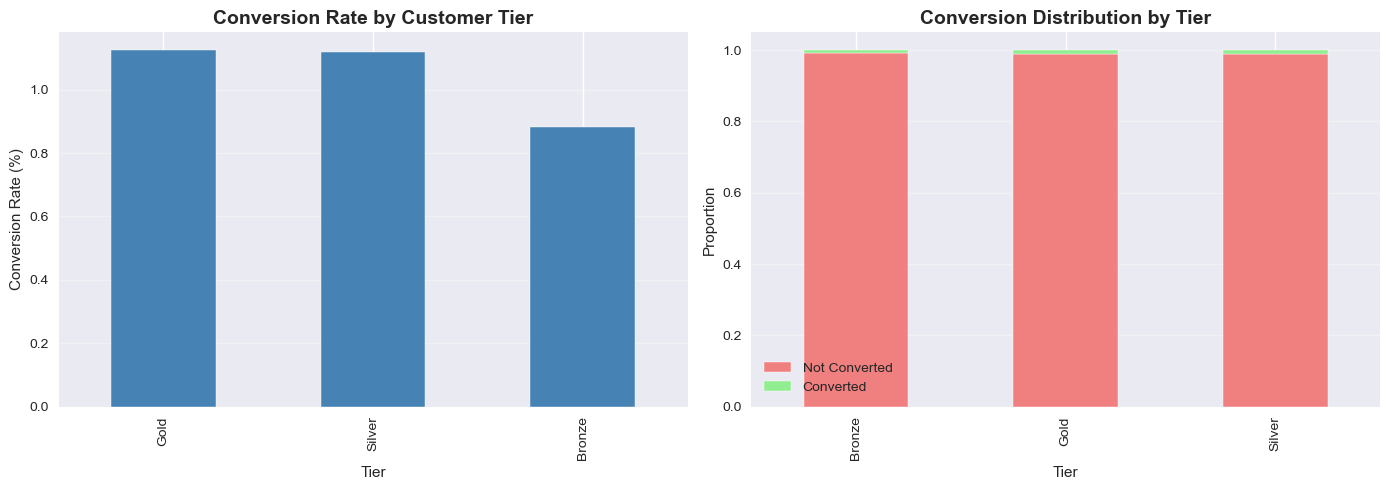


1.2 Conversion Rate by Channel:
          conversions  total  conversion_rate  conversion_rate_pct
channel                                                           
App Push          218  18070         0.012064             1.206419
Email              30   2969         0.010104             1.010441
WhatsApp           56   8961         0.006249             0.624930

1.3 Conversion Rate by Channel Preference Match:
                          conversions  total  conversion_rate  \
channel_preference_match                                        
1                                  93   7754         0.011994   
0                                 211  22246         0.009485   

                          conversion_rate_pct  
channel_preference_match                       
1                                    1.199381  
0                                    0.948485  


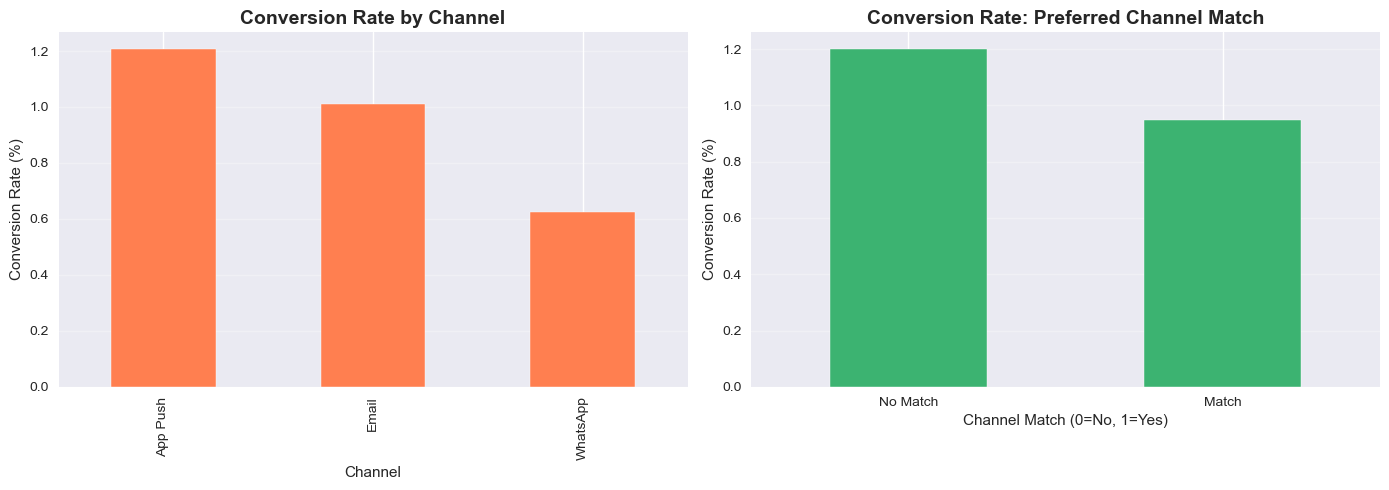


1.4 Conversion Rate by Campaign Objective:
            conversions  total  conversion_rate  conversion_rate_pct
objective                                                           
Upsell              105   9011         0.011652             1.165242
Cross-Sell          101   9018         0.011200             1.119982
Awareness            33   3005         0.010982             1.098170
Retention            65   8966         0.007250             0.724961


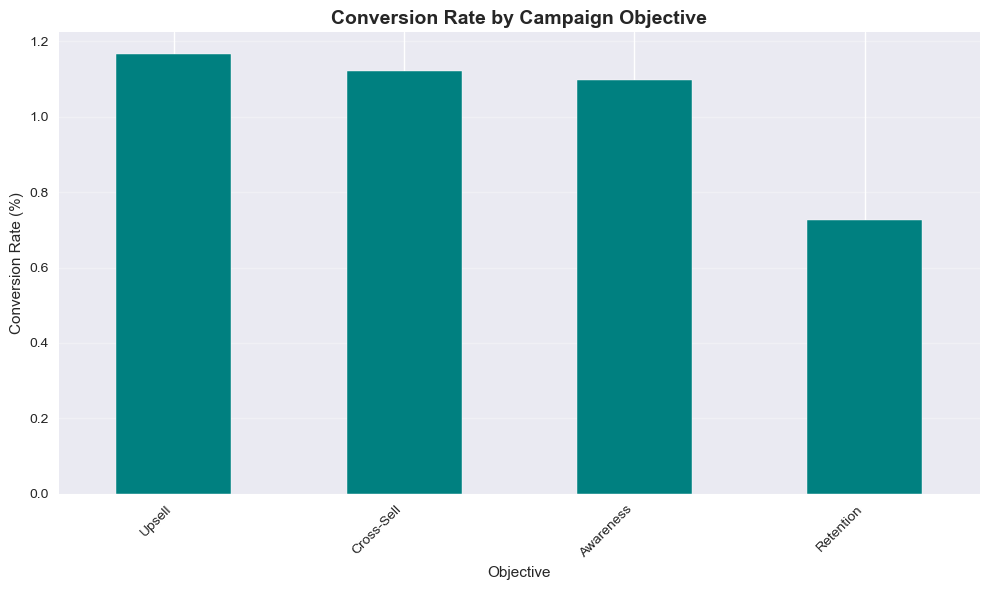


1.5 Conversion Rate by Region:
               conversions  total  conversion_rate  conversion_rate_pct
region                                                                 
Sabah/Sarawak           34   3094         0.010989             1.098901
KL/Selangor            116  10619         0.010924             1.092382
Others                  62   6034         0.010275             1.027511
Johor                   55   6104         0.009010             0.901048
Penang                  37   4149         0.008918             0.891781


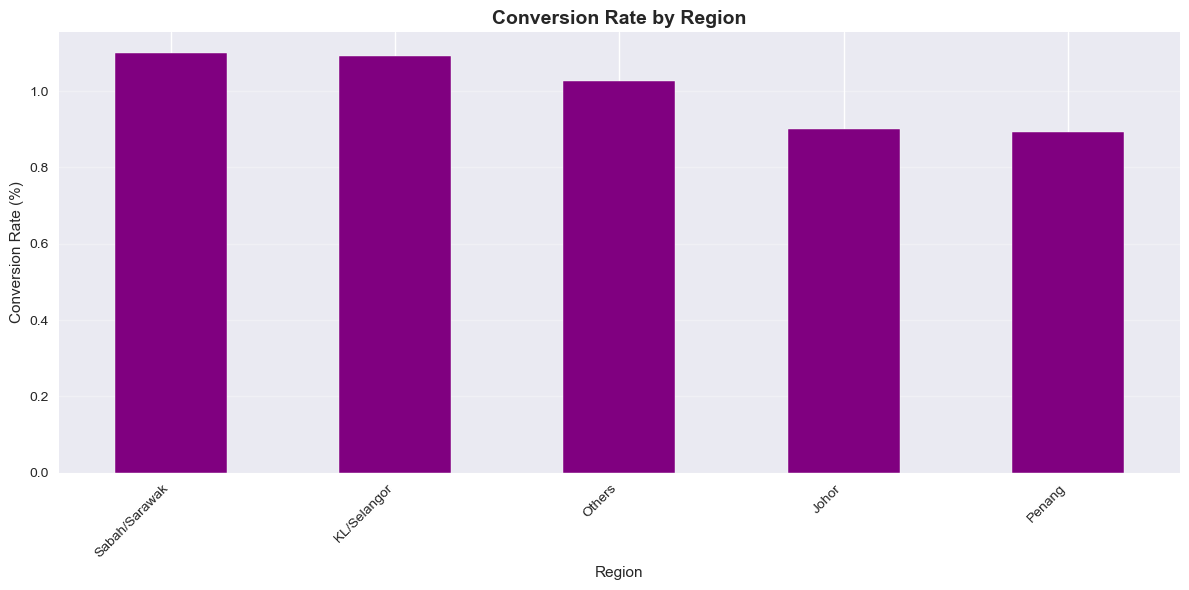


1.6 Conversion Rate by Device Type:
             conversions  total  conversion_rate  conversion_rate_pct
device_type                                                          
Desktop              106   9019         0.011753             1.175297
Mobile               198  20981         0.009437             0.943711

1.7 Conversion Rate by Active Status:
           conversions  total  conversion_rate  conversion_rate_pct
is_active                                                          
1                  233  22548         0.010334             1.033351
0                   71   7452         0.009528             0.952764

2. Distribution Analysis of Key Features...


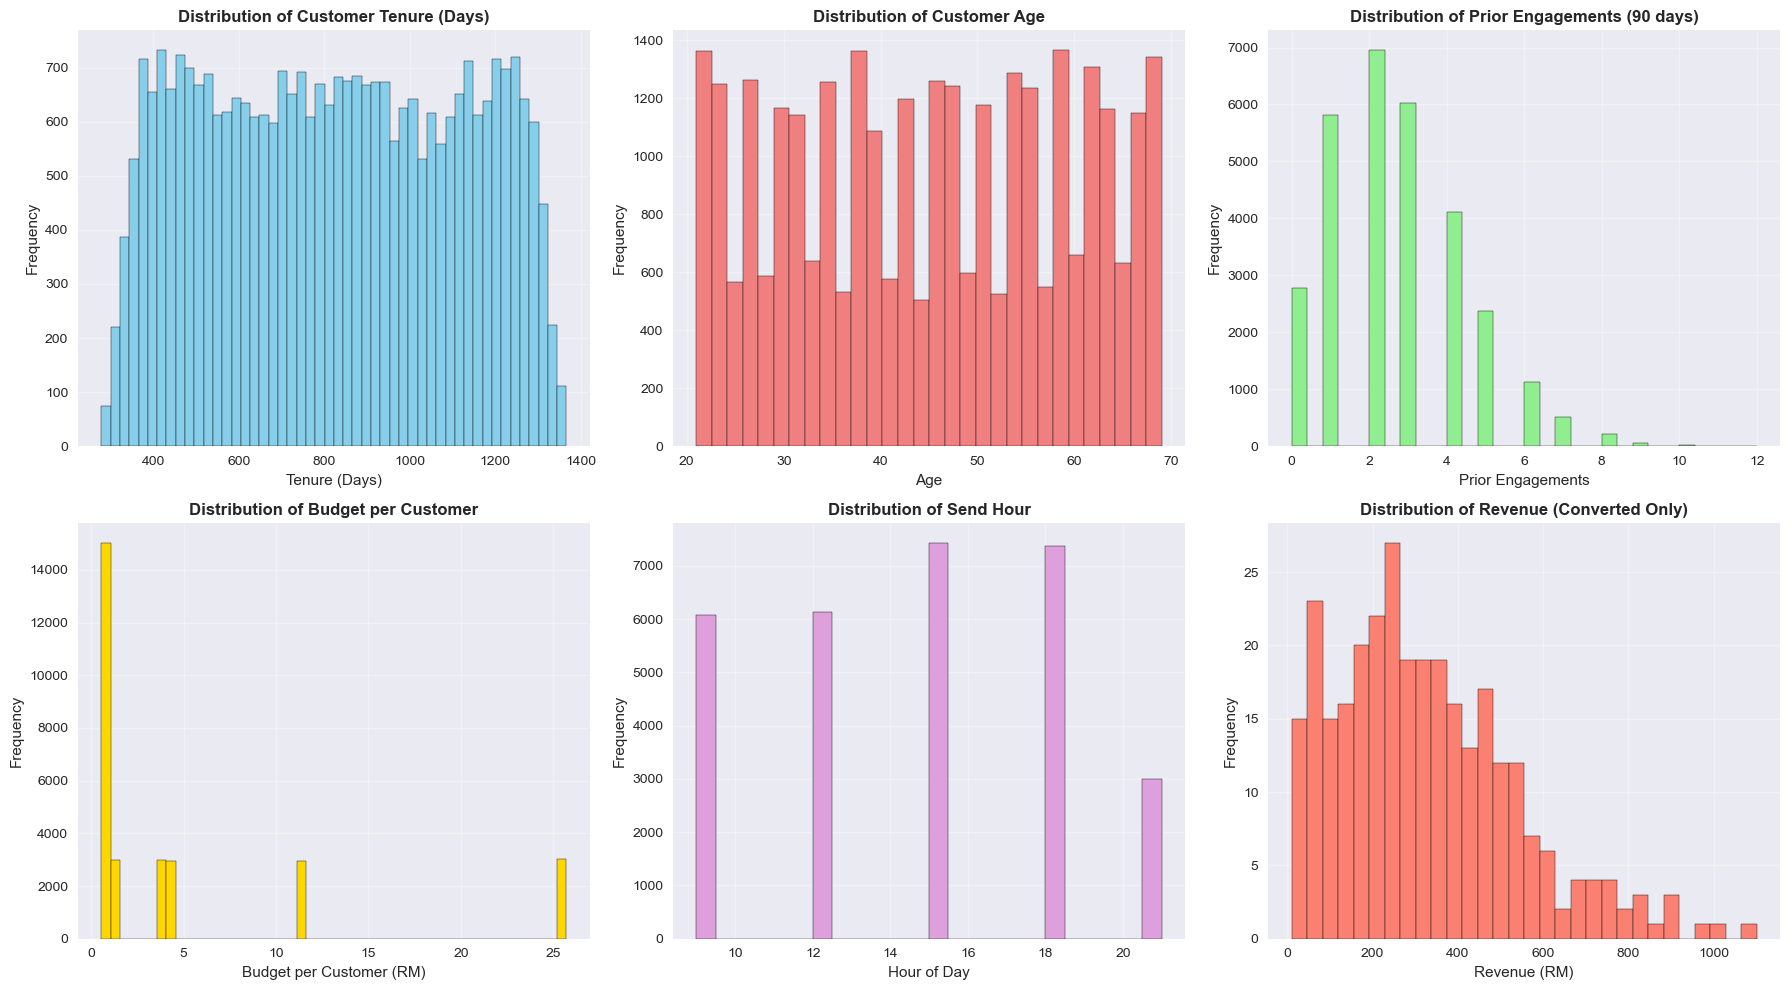


3. Correlation Analysis...

Top 15 Features Correlated with Conversion:
has_revenue                 1.000000
click_to_convert_rate       1.000000
open_to_click_rate          0.377062
hist_avg_revenue            0.329454
hist_total_revenue          0.314427
channel_preference_match    0.010967
device_encoded              0.010603
is_desktop                  0.010603
tier_encoded                0.010600
objective_upsell            0.009938
is_silver                   0.008543
hist_total_opens            0.008213
objective_cross_sell        0.006981
hist_open_rate              0.006704
hist_total_interactions     0.005241
Name: converted, dtype: float64


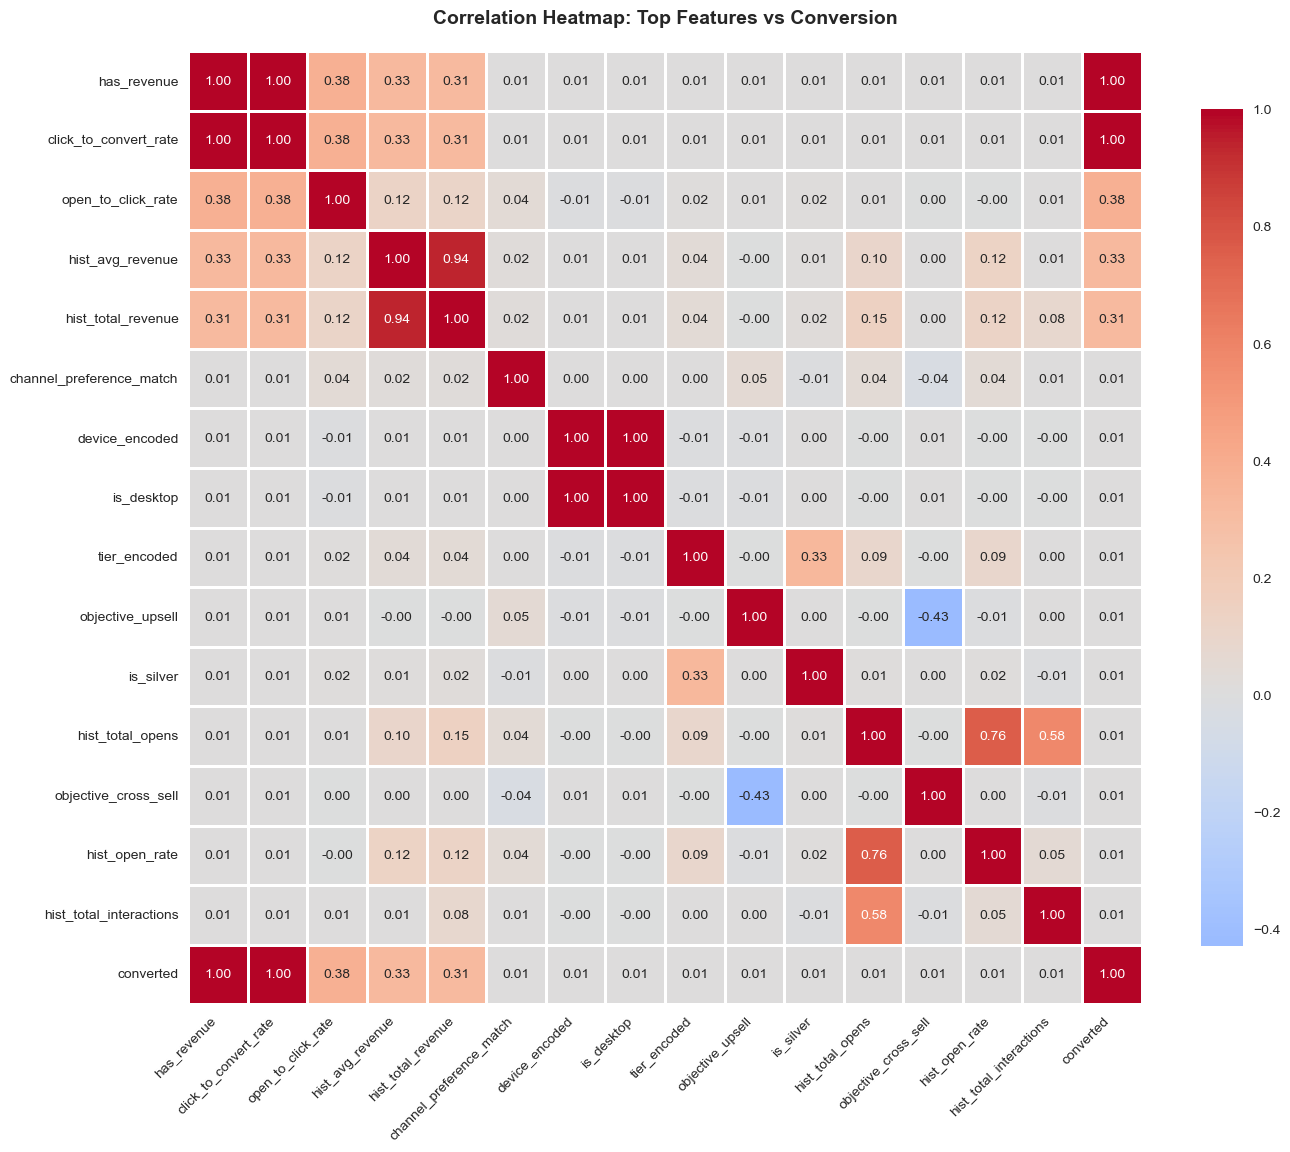


4. Temporal Pattern Analysis...

4.1 Conversion Rate by Day of Week:
               conversions  total  conversion_rate  conversion_rate_pct
send_day_name                                                          
Thursday                59   4215         0.013998             1.399763
Tuesday                 50   4729         0.010573             1.057306
Monday                  43   4126         0.010422             1.042172
Sunday                  44   4298         0.010237             1.023732
Wednesday               42   4226         0.009938             0.993848
Saturday                39   4249         0.009179             0.917863
Friday                  27   4157         0.006495             0.649507

4.2 Conversion Rate by Hour of Day (Top 5 Best, Top 5 Worst):
Best hours:
           conversions  total  conversion_rate  conversion_rate_pct
send_hour                                                          
15                  82   7435         0.011029             1.102892
18 

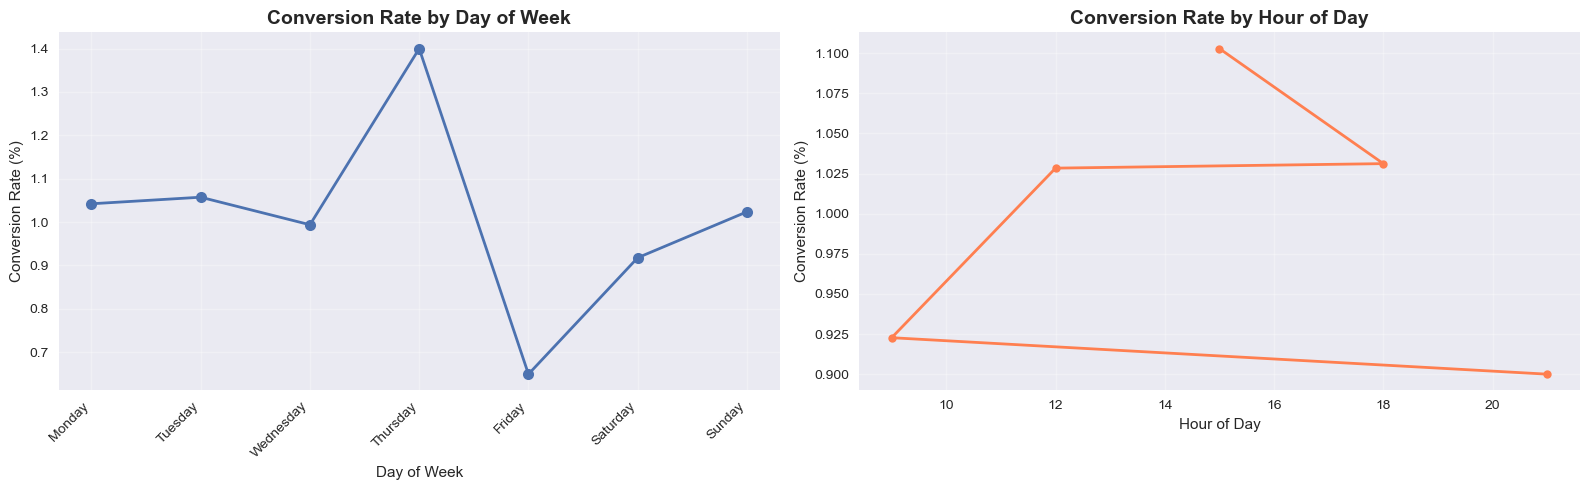


4.3 Conversion Rate by Month:
         conversions  total  conversion_rate  conversion_rate_pct
month                                                            
2025-08          106  10057         0.010540             1.053992
2025-07          104  10235         0.010161             1.016121
2025-09           94   9708         0.009683             0.968274

5. Engagement Funnel Analysis...

Funnel Metrics:
  Open Rate: 31.87%
  Click Rate: 6.72%
  Click-Through Rate: 21.07%
  Conversion Rate: 1.01%
  Click-to-Convert Rate: 15.09%


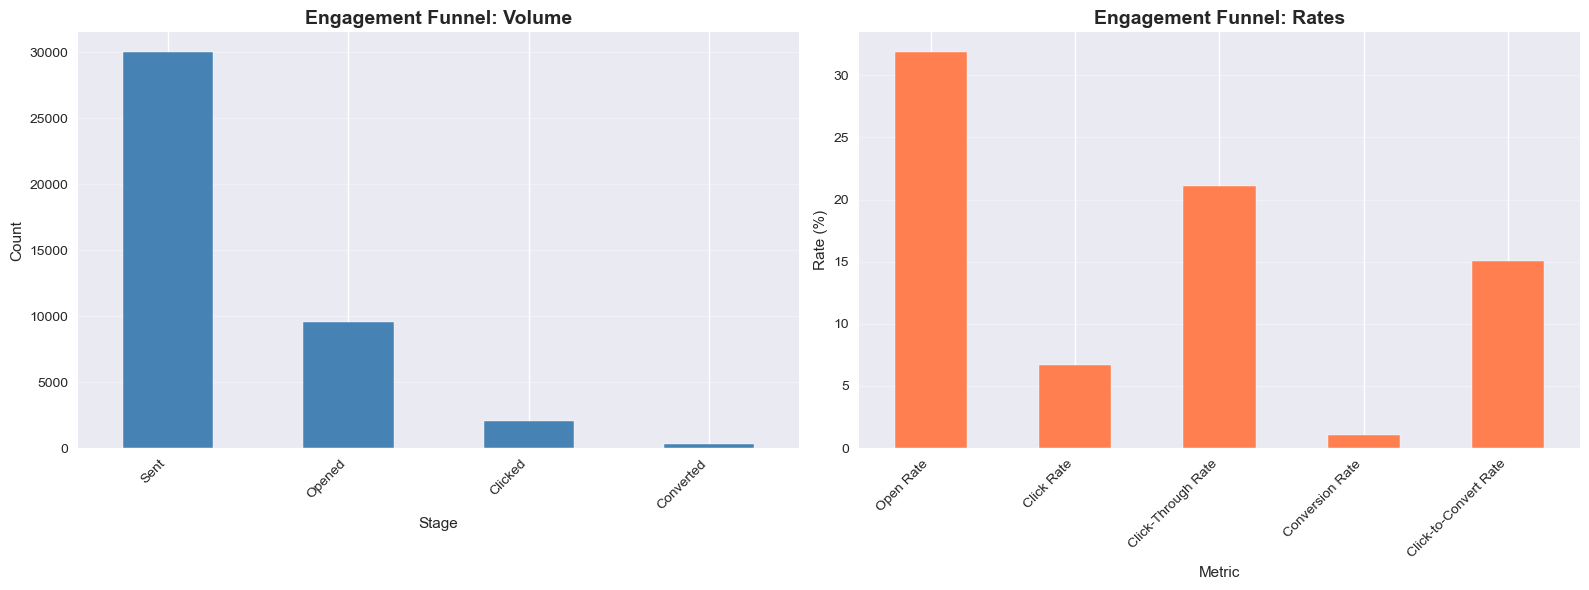


6. Cross-Segment Analysis...

6.1 Conversion Rate by Tier × Channel:
channel  App Push     Email  WhatsApp
tier                                 
Bronze   1.137347  0.525131  0.478469
Gold     1.348888  1.330377  0.629371
Silver   1.229621  1.434599  0.786517


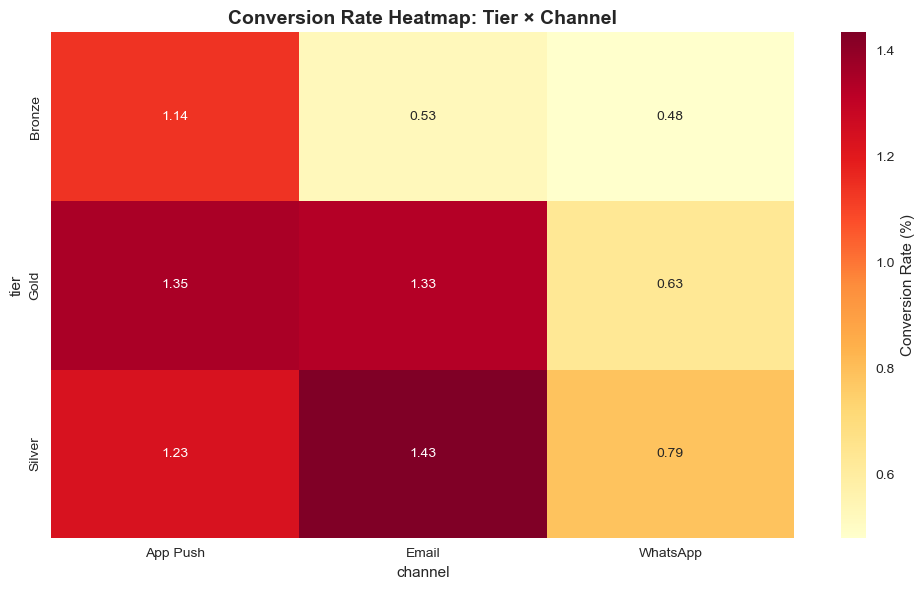


6.2 Conversion Rate by Objective × Channel:
channel     App Push     Email  WhatsApp
objective                               
Awareness   1.098170       NaN       NaN
Cross-Sell  1.337345       NaN  0.691700
Retention   0.986518       NaN  0.590717
Upsell      1.241311  1.010441       NaN

KEY INSIGHTS SUMMARY

1. Overall Conversion Rate: 1.01%
2. Total Conversions: 304 out of 30000 interactions
3. Total Revenue: RM 99,189.48
4. Average Revenue per Conversion: RM 326.28

Top Performing Segments:
  - Best Tier: Gold (1.12%)
  - Best Channel: App Push (1.21%)
  - Best Objective: Upsell (1.17%)
  - Best Region: Sabah/Sarawak (1.10%)

Feature Importance (Top 5 by Correlation):
  1. has_revenue: 1.0000
  2. click_to_convert_rate: 1.0000
  3. open_to_click_rate: 0.3771
  4. hist_avg_revenue: 0.3295
  5. hist_total_revenue: 0.3144

EDA COMPLETE - Ready for Modeling

Final dataset ready for modeling:
  Shape: (30000, 71)
  Target variable: 'converted'
  Positive class rate: 0.0101


In [10]:
print("\n" + "=" * 80)
print("SECTION 1.4: EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Set up plotting style
plt.style.use('seaborn-v0_8')
fig_size = (12, 6)

# ============================================================================
# 1. CONVERSION RATE ANALYSIS BY SEGMENTS
# ============================================================================
print("\n1. Conversion Rate Analysis by Segments...")

# Function to calculate conversion rates
def calc_conversion_rate(df, group_col, target_col='converted'):
    rates = df.groupby(group_col)[target_col].agg(['sum', 'count', 'mean'])
    rates.columns = ['conversions', 'total', 'conversion_rate']
    rates['conversion_rate_pct'] = rates['conversion_rate'] * 100
    return rates.sort_values('conversion_rate', ascending=False)

# 1.1 Conversion by Customer Tier
print("\n1.1 Conversion Rate by Customer Tier:")
tier_conversion = calc_conversion_rate(df, 'tier')
print(tier_conversion)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
tier_conversion['conversion_rate_pct'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Conversion Rate by Customer Tier', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Conversion Rate (%)')
axes[0].set_xlabel('Tier')
axes[0].grid(axis='y', alpha=0.3)

df.groupby('tier')['converted'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[1], color=['lightcoral', 'lightgreen']
)
axes[1].set_title('Conversion Distribution by Tier', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Tier')
axes[1].legend(['Not Converted', 'Converted'])
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 1.2 Conversion by Channel
print("\n1.2 Conversion Rate by Channel:")
channel_conversion = calc_conversion_rate(df, 'channel')
print(channel_conversion)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
channel_conversion['conversion_rate_pct'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Conversion Rate by Channel', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Conversion Rate (%)')
axes[0].set_xlabel('Channel')
axes[0].grid(axis='y', alpha=0.3)

# Channel preference match impact
pref_match_conversion = calc_conversion_rate(df, 'channel_preference_match')
print("\n1.3 Conversion Rate by Channel Preference Match:")
print(pref_match_conversion)
pref_match_conversion['conversion_rate_pct'].plot(kind='bar', ax=axes[1], color='mediumseagreen')
axes[1].set_title('Conversion Rate: Preferred Channel Match', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_xlabel('Channel Match (0=No, 1=Yes)')
axes[1].set_xticklabels(['No Match', 'Match'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 1.3 Conversion by Campaign Objective
print("\n1.4 Conversion Rate by Campaign Objective:")
objective_conversion = calc_conversion_rate(df, 'objective')
print(objective_conversion)

fig, ax = plt.subplots(figsize=(10, 6))
objective_conversion['conversion_rate_pct'].plot(kind='bar', color='teal')
ax.set_title('Conversion Rate by Campaign Objective', fontsize=14, fontweight='bold')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xlabel('Objective')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 1.4 Conversion by Region
print("\n1.5 Conversion Rate by Region:")
region_conversion = calc_conversion_rate(df, 'region')
print(region_conversion)

fig, ax = plt.subplots(figsize=(12, 6))
region_conversion['conversion_rate_pct'].plot(kind='bar', color='purple')
ax.set_title('Conversion Rate by Region', fontsize=14, fontweight='bold')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xlabel('Region')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 1.5 Conversion by Device Type
print("\n1.6 Conversion Rate by Device Type:")
device_conversion = calc_conversion_rate(df, 'device_type')
print(device_conversion)

# 1.6 Conversion by Active Status
print("\n1.7 Conversion Rate by Active Status:")
active_conversion = calc_conversion_rate(df, 'is_active')
print(active_conversion)

# ============================================================================
# 2. DISTRIBUTION ANALYSIS
# ============================================================================
print("\n2. Distribution Analysis of Key Features...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 2.1 Customer Tenure Distribution
df['customer_tenure_days'].hist(bins=50, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Customer Tenure (Days)', fontweight='bold')
axes[0, 0].set_xlabel('Tenure (Days)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# 2.2 Age Distribution
df['age'].hist(bins=30, ax=axes[0, 1], color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Customer Age', fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# 2.3 Prior Engagements Distribution
df['prior_engagements_90d'].hist(bins=30, ax=axes[0, 2], color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Distribution of Prior Engagements (90 days)', fontweight='bold')
axes[0, 2].set_xlabel('Prior Engagements')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(alpha=0.3)

# 2.4 Budget per Customer Distribution
df['budget_per_customer'].hist(bins=50, ax=axes[1, 0], color='gold', edgecolor='black')
axes[1, 0].set_title('Distribution of Budget per Customer', fontweight='bold')
axes[1, 0].set_xlabel('Budget per Customer (RM)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

# 2.5 Send Hour Distribution
df['send_hour'].hist(bins=24, ax=axes[1, 1], color='plum', edgecolor='black')
axes[1, 1].set_title('Distribution of Send Hour', fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.3)

# 2.6 Revenue Distribution (for converted only)
converted_revenue = df[df['converted'] == 1]['revenue_rm']
converted_revenue.hist(bins=30, ax=axes[1, 2], color='salmon', edgecolor='black')
axes[1, 2].set_title('Distribution of Revenue (Converted Only)', fontweight='bold')
axes[1, 2].set_xlabel('Revenue (RM)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 3. CORRELATION ANALYSIS
# ============================================================================
print("\n3. Correlation Analysis...")

# Select numeric features for correlation
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID columns and target leakage columns
exclude_cols = ['interaction_id', 'customer_id', 'campaign_id', 
                'opened', 'clicked', 'converted', 'revenue_rm',
                'send_year', 'send_month', 'send_day']  # Remove some temporal that might not be useful
correlation_features = [c for c in numeric_features if c not in exclude_cols]

# Calculate correlation with conversion
corr_with_target = df[correlation_features + ['converted']].corr()['converted'].sort_values(ascending=False)
print("\nTop 15 Features Correlated with Conversion:")
print(corr_with_target[1:16])  # Exclude 'converted' itself

# Create correlation heatmap for top features
top_features = corr_with_target[1:16].index.tolist()
corr_matrix = df[top_features + ['converted']].corr()

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Heatmap: Top Features vs Conversion', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================================
# 4. TEMPORAL PATTERNS
# ============================================================================
print("\n4. Temporal Pattern Analysis...")

# 4.1 Conversion by Day of Week
dow_conversion = calc_conversion_rate(df, 'send_day_name')
print("\n4.1 Conversion Rate by Day of Week:")
print(dow_conversion)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_conversion_reordered = dow_conversion.reindex(dow_order)
dow_conversion_reordered['conversion_rate_pct'].plot(kind='line', marker='o', ax=axes[0], linewidth=2, markersize=8)
axes[0].set_title('Conversion Rate by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Conversion Rate (%)')
axes[0].set_xlabel('Day of Week')
axes[0].grid(alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4.2 Conversion by Hour of Day
hour_conversion = calc_conversion_rate(df, 'send_hour')
print("\n4.2 Conversion Rate by Hour of Day (Top 5 Best, Top 5 Worst):")
print("Best hours:")
print(hour_conversion.head())
print("\nWorst hours:")
print(hour_conversion.tail())

hour_conversion['conversion_rate_pct'].plot(kind='line', marker='o', ax=axes[1], linewidth=2, markersize=6, color='coral')
axes[1].set_title('Conversion Rate by Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_xlabel('Hour of Day')
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4.3 Conversion by Month
month_conversion = calc_conversion_rate(df, 'month')
print("\n4.3 Conversion Rate by Month:")
print(month_conversion)

# ============================================================================
# 5. ENGAGEMENT FUNNEL ANALYSIS
# ============================================================================
print("\n5. Engagement Funnel Analysis...")

funnel_data = {
    'Sent': len(df),
    'Opened': df['opened'].sum(),
    'Clicked': df['clicked'].sum(),
    'Converted': df['converted'].sum()
}

funnel_rates = {
    'Open Rate': (funnel_data['Opened'] / funnel_data['Sent']) * 100,
    'Click Rate': (funnel_data['Clicked'] / funnel_data['Sent']) * 100,
    'Click-Through Rate': (funnel_data['Clicked'] / funnel_data['Opened']) * 100 if funnel_data['Opened'] > 0 else 0,
    'Conversion Rate': (funnel_data['Converted'] / funnel_data['Sent']) * 100,
    'Click-to-Convert Rate': (funnel_data['Converted'] / funnel_data['Clicked']) * 100 if funnel_data['Clicked'] > 0 else 0
}

print("\nFunnel Metrics:")
for metric, value in funnel_rates.items():
    print(f"  {metric}: {value:.2f}%")

# Visualize funnel
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Funnel volume
funnel_df = pd.DataFrame(list(funnel_data.items()), columns=['Stage', 'Count'])
funnel_df['Percentage'] = (funnel_df['Count'] / funnel_df['Count'].iloc[0]) * 100
funnel_df.plot(x='Stage', y='Count', kind='bar', ax=axes[0], color='steelblue', legend=False)
axes[0].set_title('Engagement Funnel: Volume', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Stage')
axes[0].grid(axis='y', alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Funnel rates
rates_df = pd.DataFrame(list(funnel_rates.items()), columns=['Metric', 'Rate'])
rates_df.plot(x='Metric', y='Rate', kind='bar', ax=axes[1], color='coral', legend=False)
axes[1].set_title('Engagement Funnel: Rates', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rate (%)')
axes[1].set_xlabel('Metric')
axes[1].grid(axis='y', alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ============================================================================
# 6. CROSS-SEGMENT ANALYSIS
# ============================================================================
print("\n6. Cross-Segment Analysis...")

# 6.1 Tier × Channel
tier_channel = df.groupby(['tier', 'channel'])['converted'].agg(['sum', 'count', 'mean']).reset_index()
tier_channel.columns = ['tier', 'channel', 'conversions', 'total', 'conversion_rate']
tier_channel['conversion_rate_pct'] = tier_channel['conversion_rate'] * 100
print("\n6.1 Conversion Rate by Tier × Channel:")
print(tier_channel.pivot(index='tier', columns='channel', values='conversion_rate_pct'))

# Visualize
pivot_data = tier_channel.pivot(index='tier', columns='channel', values='conversion_rate_pct')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Conversion Rate (%)'})
ax.set_title('Conversion Rate Heatmap: Tier × Channel', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 6.2 Objective × Channel
obj_channel = df.groupby(['objective', 'channel'])['converted'].agg(['sum', 'count', 'mean']).reset_index()
obj_channel.columns = ['objective', 'channel', 'conversions', 'total', 'conversion_rate']
obj_channel['conversion_rate_pct'] = obj_channel['conversion_rate'] * 100
print("\n6.2 Conversion Rate by Objective × Channel:")
print(obj_channel.pivot(index='objective', columns='channel', values='conversion_rate_pct'))

# ============================================================================
# 7. KEY INSIGHTS SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n1. Overall Conversion Rate: {:.2f}%".format(df['converted'].mean() * 100))
print(f"2. Total Conversions: {df['converted'].sum()} out of {len(df)} interactions")
print(f"3. Total Revenue: RM {df['revenue_rm'].sum():,.2f}")
print(f"4. Average Revenue per Conversion: RM {df[df['converted']==1]['revenue_rm'].mean():,.2f}")

print("\nTop Performing Segments:")
print(f"  - Best Tier: {tier_conversion.index[0]} ({tier_conversion.iloc[0]['conversion_rate_pct']:.2f}%)")
print(f"  - Best Channel: {channel_conversion.index[0]} ({channel_conversion.iloc[0]['conversion_rate_pct']:.2f}%)")
print(f"  - Best Objective: {objective_conversion.index[0]} ({objective_conversion.iloc[0]['conversion_rate_pct']:.2f}%)")
print(f"  - Best Region: {region_conversion.index[0]} ({region_conversion.iloc[0]['conversion_rate_pct']:.2f}%)")

print("\nFeature Importance (Top 5 by Correlation):")
top_corr = corr_with_target[1:6]
for i, (feature, corr) in enumerate(top_corr.items(), 1):
    print(f"  {i}. {feature}: {corr:.4f}")

print("\n" + "=" * 80)
print("EDA COMPLETE - Ready for Modeling")
print("=" * 80)

# Save the engineered dataset for modeling
print(f"\nFinal dataset ready for modeling:")
print(f"  Shape: {df.shape}")
print(f"  Target variable: 'converted'")
print(f"  Positive class rate: {df['converted'].mean():.4f}")